In [5]:
from sklearn.datasets import load_wine
import pandas as pd

dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

In [6]:

print(' Num of instances: ', X.shape[0])

# Missing values:
df_data = pd.DataFrame(X)
df_drop = df_data.dropna()
if df_drop.shape == df_data.shape:
  print('\n No missing values')
else: 
  print('\n There are some miss values')

print("\n Num of instances per class:")
y_series = pd.Series(data=y)
print(y_series.value_counts())

 Num of instances:  178

 No missing values

 Num of instances per class:
1    71
0    59
2    48
dtype: int64


In [7]:
from sklearn.tree import DecisionTreeClassifier
import sklearn

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

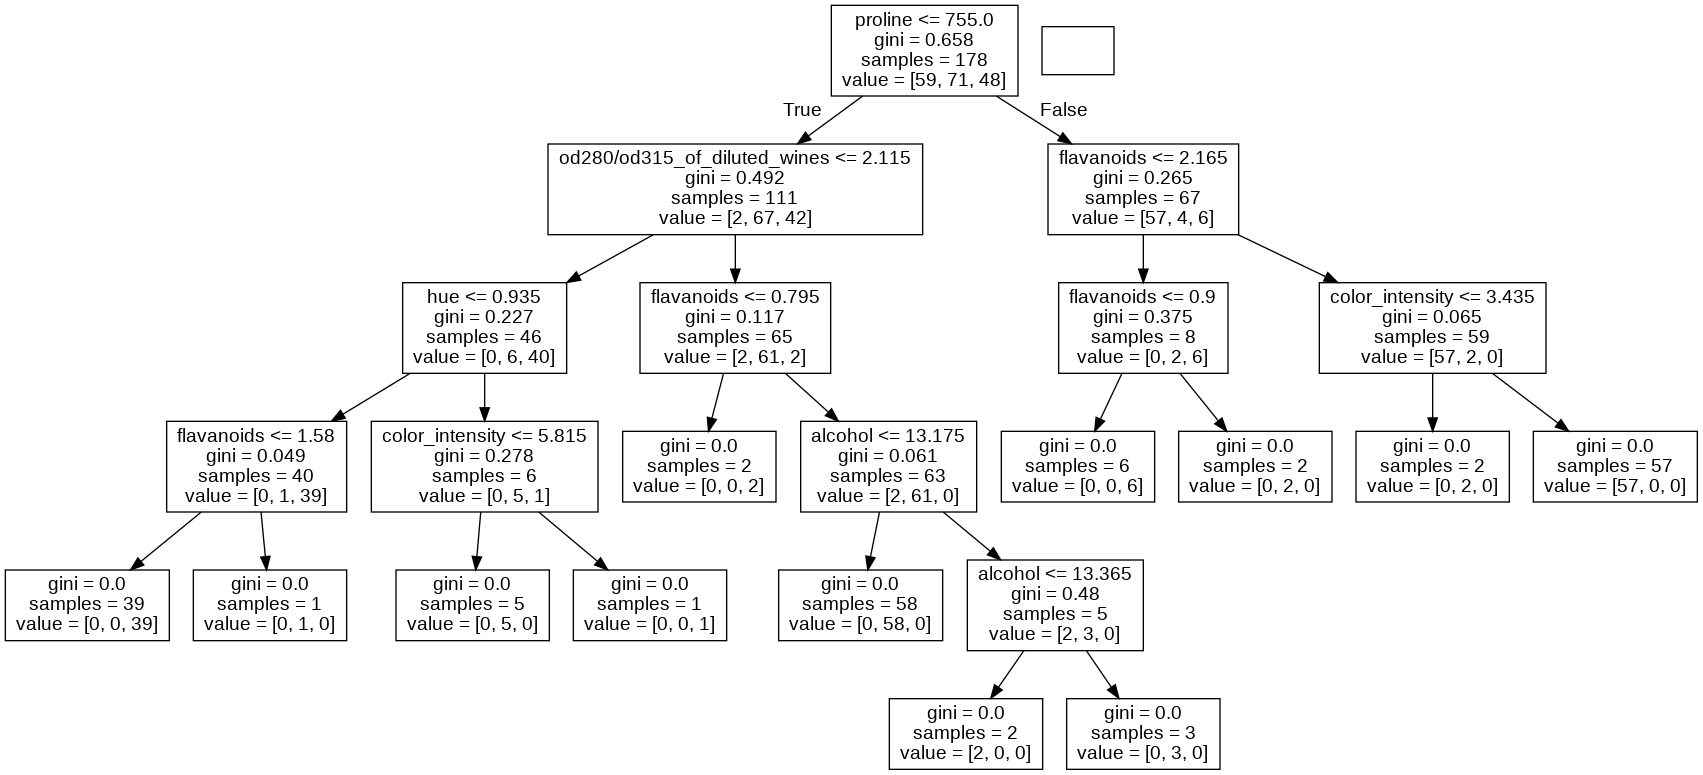

In [8]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_code = export_graphviz(clf, feature_names=feature_names)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

In [9]:
from sklearn.metrics import accuracy_score

# predictions:
y_pred = clf.predict(X)
print('The accuracy is: ', accuracy_score(y, y_pred))

The accuracy is:  1.0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [11]:
clf_1 = DecisionTreeClassifier()
clf_1.fit(X_train, y_train)

y_pred = clf_1.predict(X_test)
print("The accuracy on the test is: ", accuracy_score(y_pred=y_pred, y_true=y_test))

The accuracy on the test is:  0.8888888888888888


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision: TP / (TP + FP)
print("The micro-precision is: ", precision_score(y_test, y_pred, average='micro')) # takes imbalance into account with total TP, FN, FP
print("The macro-precision is: ", precision_score(y_test, y_pred, average='macro')) # unweighted mean, don't take imbalance into account

# Recall: TP / (FN + TP)
print("The micro-recall is: ", recall_score(y_test, y_pred, average='micro')) # takes imbalance into account with total TP, FN, FP
print("The macro-recall is: ", recall_score(y_test, y_pred, average='macro')) # unweighted mean, don't take imbalance into account

# F1 Score: 2 * (precision * recall) / (precision + recall)
print("The micro-F1 is: ", f1_score(y_test, y_pred, average='micro')) # takes imbalance into account with total TP, FN, FP
print("The macro-F1 is: ", f1_score(y_test, y_pred, average='macro')) # unweighted mean, don't take imbalance into account


The micro-precision is:  0.8888888888888888
The macro-precision is:  0.8905723905723906
The micro-recall is:  0.8888888888888888
The macro-recall is:  0.912962962962963
The micro-F1 is:  0.8888888888888888
The macro-F1 is:  0.8982456140350877


In [13]:
from sklearn.metrics import classification_report

print("Classif report: ", classification_report(y_test, y_pred))

Classif report:                precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.94      0.85      0.89        20
           2       1.00      1.00      1.00         7

    accuracy                           0.89        36
   macro avg       0.89      0.91      0.90        36
weighted avg       0.90      0.89      0.89        36



In [14]:
# Grid search:, 
from sklearn.model_selection import ParameterGrid
import numpy as np

params = {
"criterion": ['gini'], # ??? entropy helps when there's class imbalance?
"max_depth": [6, 8], # The maximum depth of the tree. If None, then
# nodes are expanded until all leaves are pure or until all leaves contain 
# less than min_samples_split samples
"splitter": ["random"],  # Random is less prone to overfitting because 
                # you are not essentially calculating the best split before each split and 
                # the additional randomness will help you here
"min_samples_split": [4, 8, 16], #  Higher values prevent a model from learning relations
                # which might be highly specific to the particular sample selected for a tree.
                # Too high values can also lead to under-fitting
"min_samples_leaf": [1, 2, 4] #  When you have an imbalanced class problem, because then the regions
                              # in which the minority class will be in majority will
                              # be very small, you should go with a lower value,
                              # otherwise higher values tend to help with overfitting
#"min_impurity_decrease": [0.] # The best way to tune this is to plot the decision tree and look into the gini index
                                 # Then you can look into the splits that lead to 0 gini index and see if it makes sense
                                 # to classify your classes as such or whether you can reduce the depth thereby leading to a more generalizable tree
}

# Example: min_samples_split = 5, min_samples_leaf = 2, --> during training a node has 7 samples 
# and split into 2 nodes with 1 and 6 samples respectively, then this split is not allowed because of min_samples_leaf = 2

for config in ParameterGrid(params):
  print(config)
  clf = DecisionTreeClassifier(**config)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  curr_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
  print(curr_acc)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
0.9166666666666666
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}
0.8888888888888888
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 16, 'splitter': 'random'}
0.9166666666666666
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'random'}
0.9166666666666666
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'}
0.9166666666666666
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 16, 'splitter': 'random'}
0.8611111111111112
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}
0.9722222222222222
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'random'}
0.8888888

In [15]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
best_acc = 0
best_clf = DecisionTreeClassifier()

for train_indices, validation_indices in kf.split(X_train_valid): # kf.split() returns a list of tuples
  X_train = X_train_valid[train_indices]
  X_valid = X_train_valid[validation_indices]
  y_train = y_train_valid[train_indices]
  y_valid = y_train_valid[validation_indices]
  for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    y_pred_kfold = clf.predict(X_valid)
    curr_acc = accuracy_score(y_true=y_valid, y_pred=y_pred_kfold)
    if curr_acc > best_acc:
      print(config)
      best_acc = curr_acc
      best_clf = clf

print("Best acc on k-fold: ", best_acc)

final_pred = best_clf.predict(X_test)
print('Acc on test: ',  accuracy_score(y_test, final_pred))




{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
Best acc on k-fold:  1.0
Acc on test:  0.9166666666666666


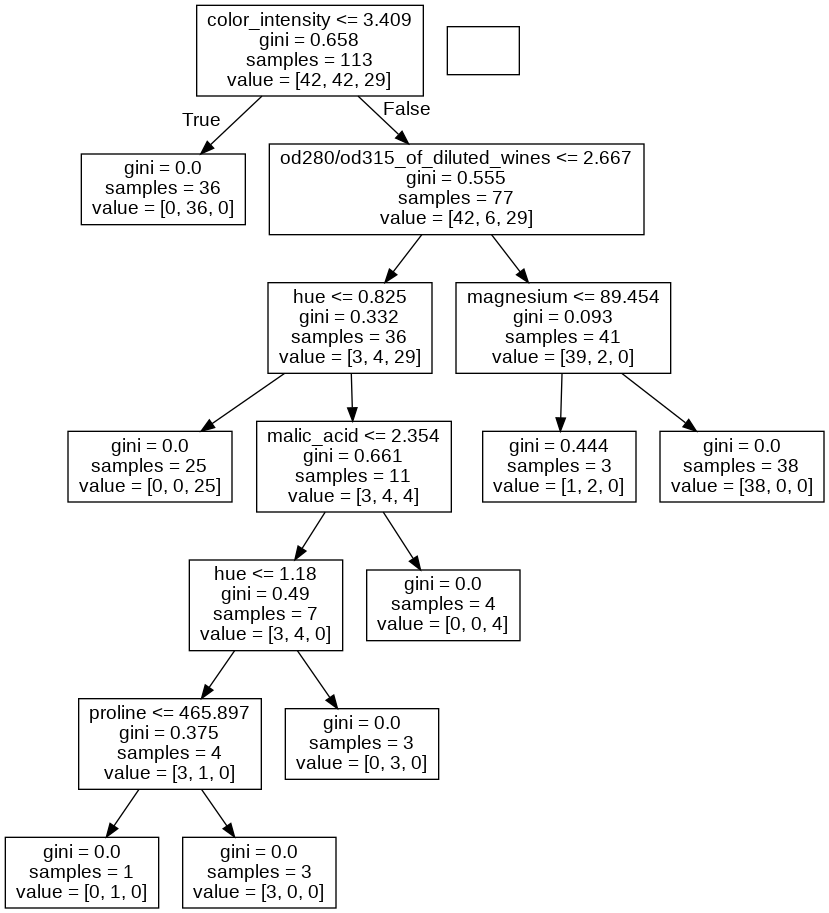

In [16]:
# Let's print the best clf found
dot_code = export_graphviz(best_clf, feature_names=feature_names)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

# **PART 2.2**



In [17]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=8c4cbc84ac6f2642b3654d55ab70a23b0d95729dc90004b77a6c06674a615e14
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [18]:
import wget

url = "https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv"

wget.download(url)

'2d-synthetic.csv'

In [19]:
import pandas as pd

df = pd.read_csv("2d-synthetic.csv")
df

,x0,x1,label
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0
...,...,...,...
495,4.995458,8.437083,0
496,6.636632,9.931535,0
497,6.373259,8.098388,0
498,1.230331,7.169844,1


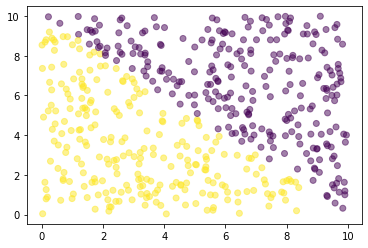

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['x0'], df['x1'],c=df['label'], alpha=0.5)

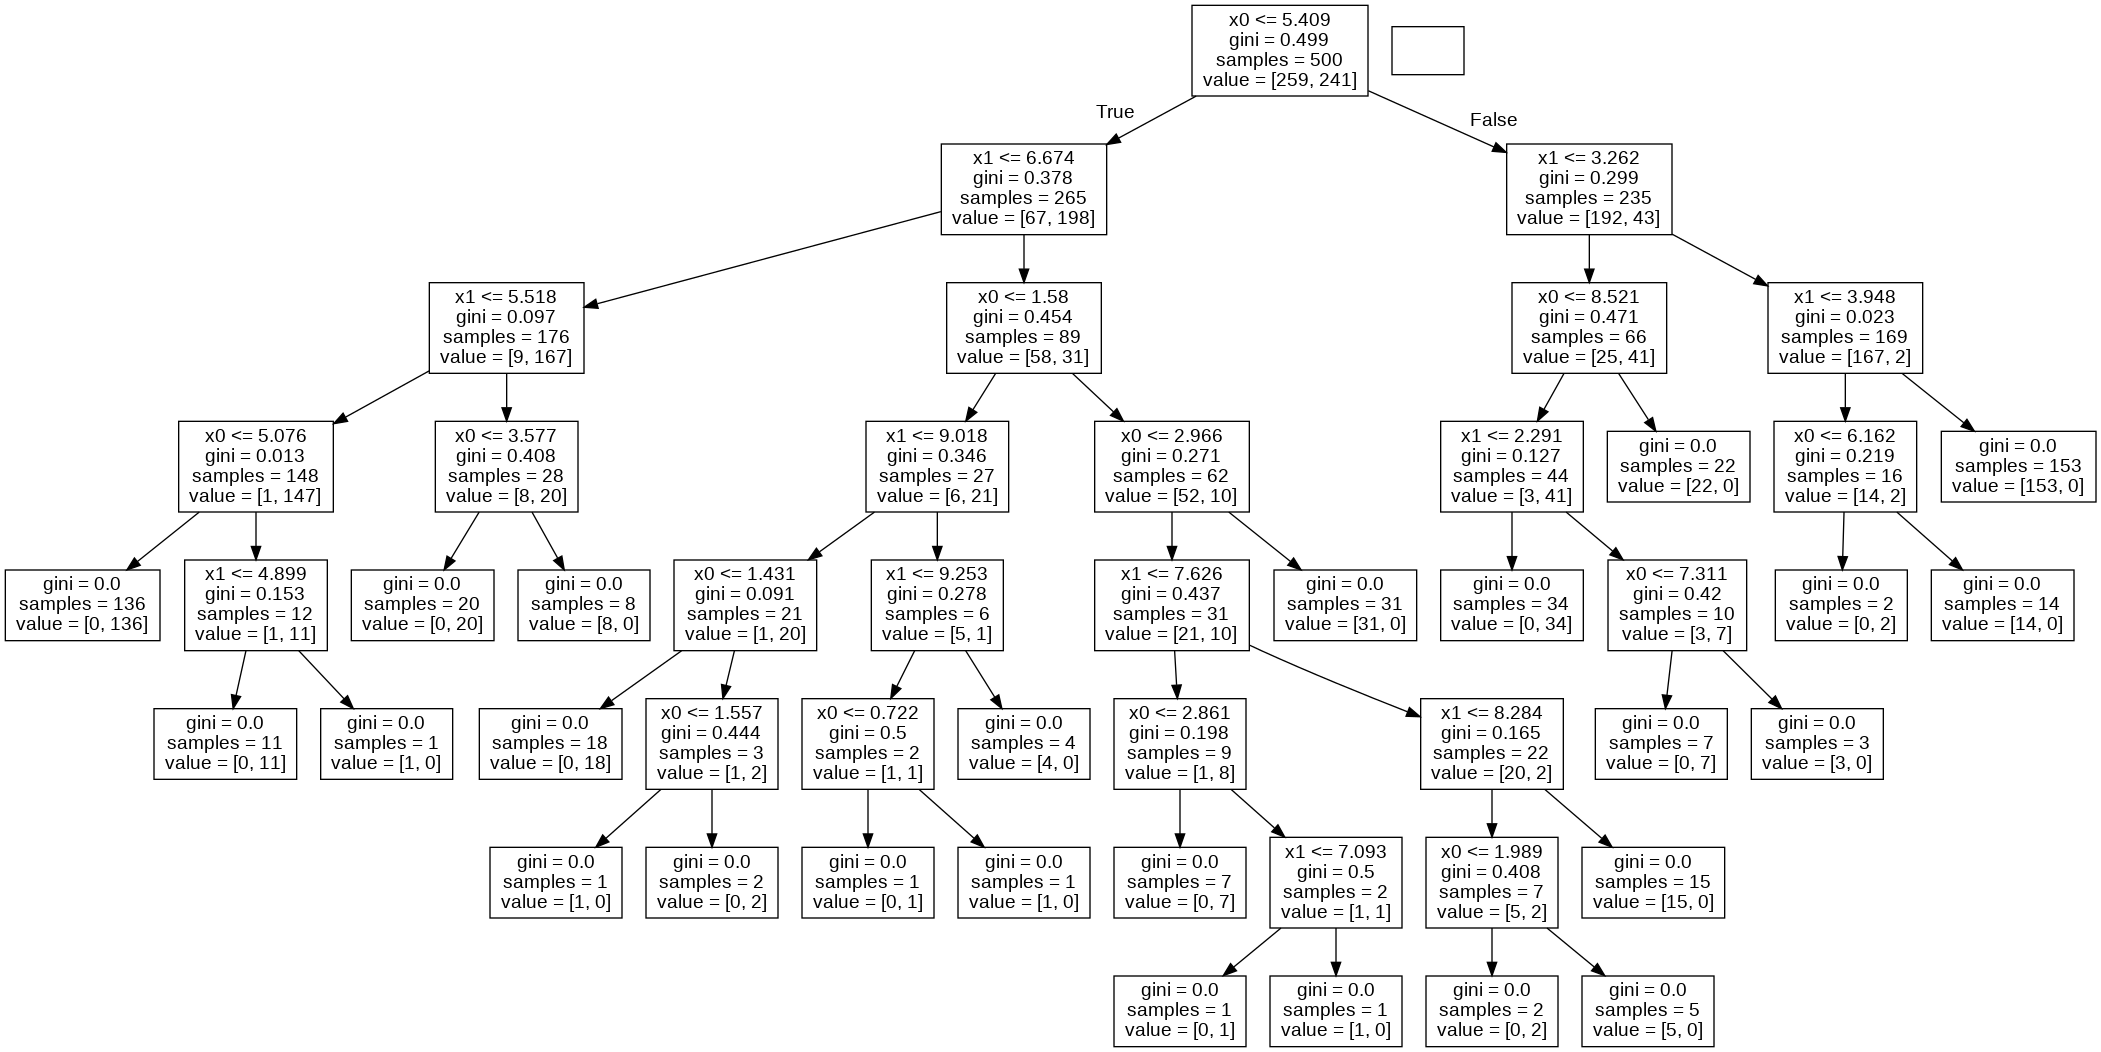

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X=df.drop(columns='label'), y=df['label'])
dot_code = export_graphviz(clf, feature_names=df.columns[:2])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

In [22]:
y_pred = clf.predict(df.drop(columns='label'))
accuracy_score(df['label'], y_pred)

1.0

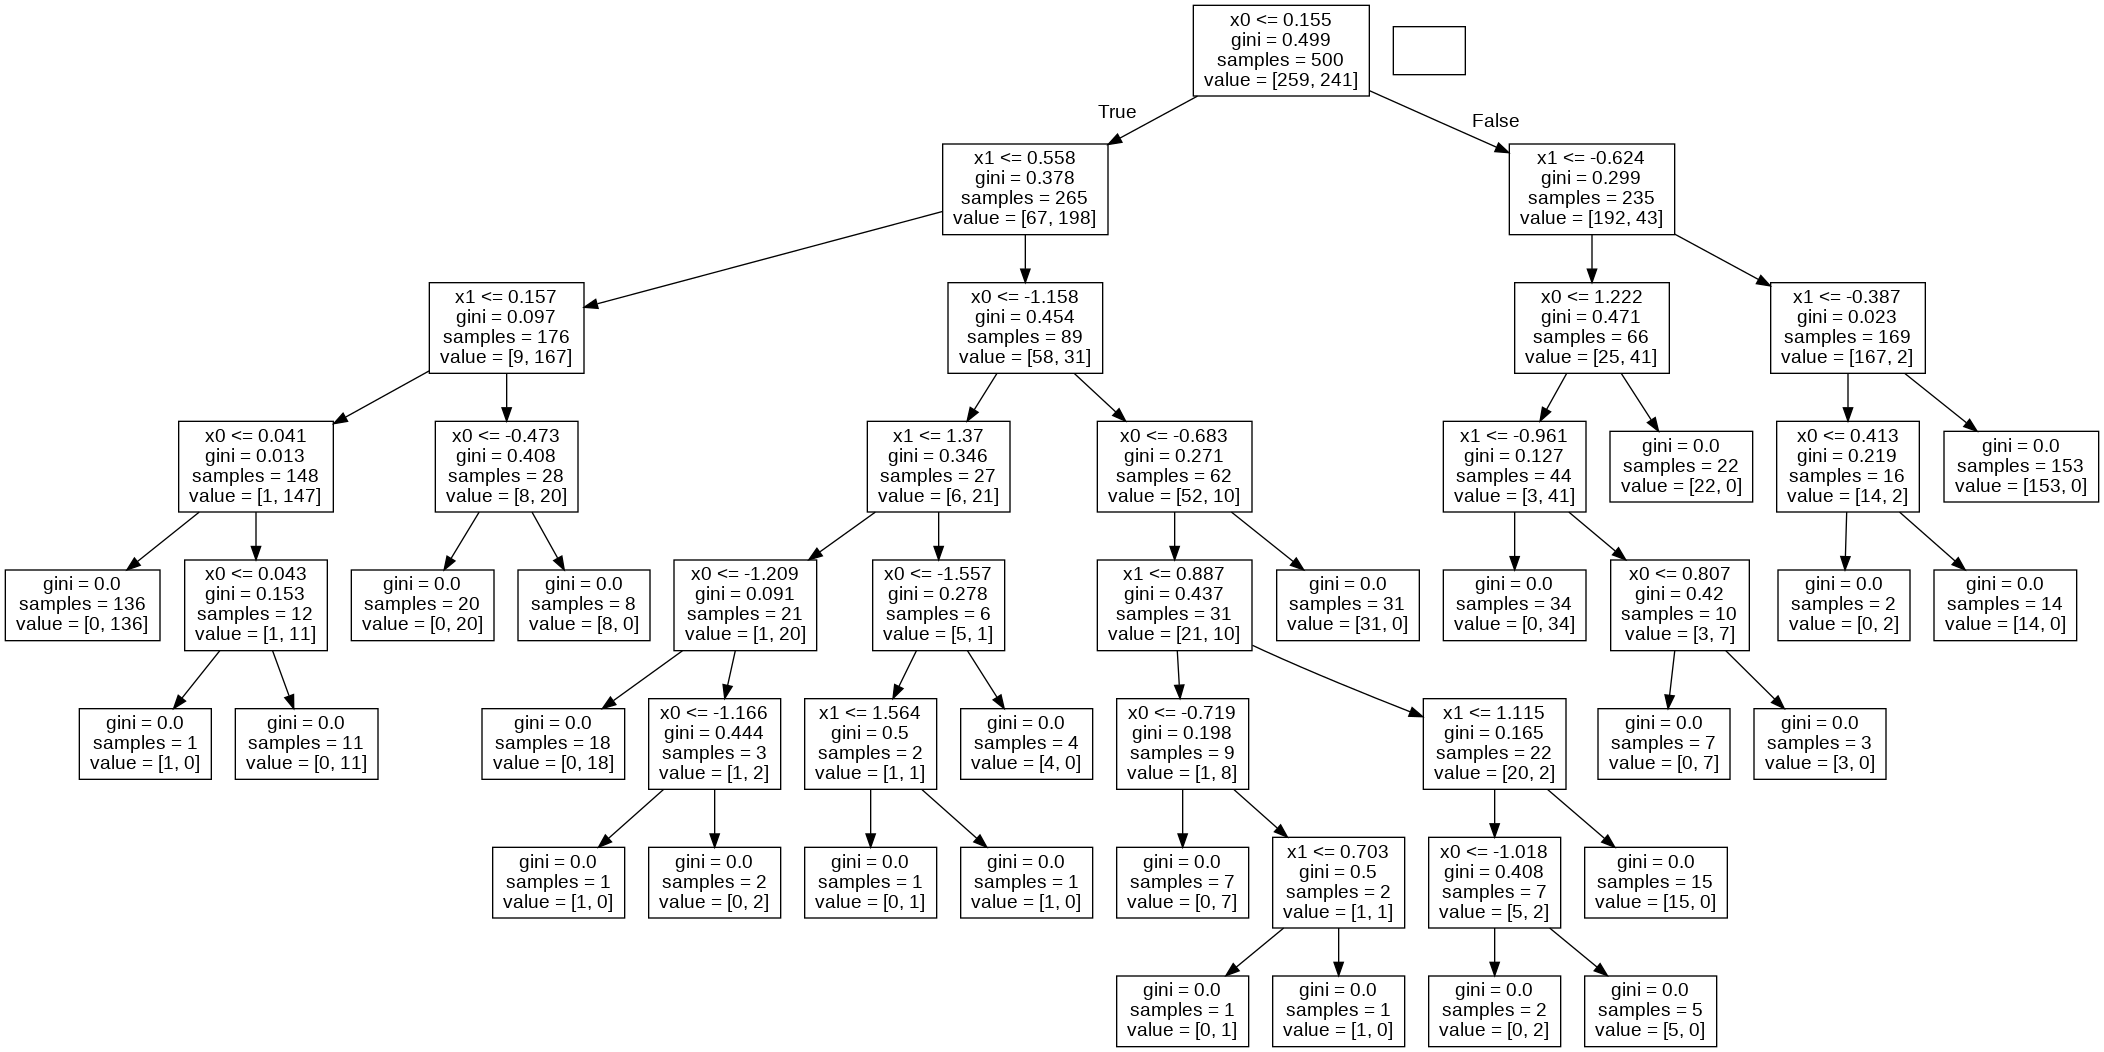

In [23]:
# Preprocessing:

df_drop = df.drop(columns='label')
df_drop = (df_drop - df_drop.mean()) / df_drop.std()

clf = DecisionTreeClassifier()
clf.fit(df_drop, df['label'])

dot_code = export_graphviz(clf, feature_names=df.columns[:2])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

We already know that decision trees can only work on a single feature at a time, and that it can only compute splits based on feature <= threshold. We also know (by observing our data), that the problem can be separated by a line in the form of x0 + x1 + K = 0 (where K needs to be defined).

With these two pieces of information, we can build a dataset X_ more suitable for our decision tree: this new dataset will contain the sum of x0 and x1, so that the decision tree will be able to compute the right K for the split

(500, 1)


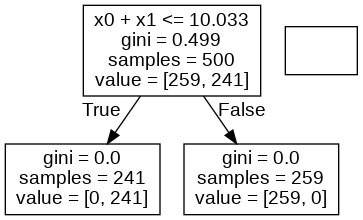

In [24]:
X_ = (df['x0'].to_numpy() + df['x1'].to_numpy()).reshape(500, 1)
print(X_.shape)

clf_ = DecisionTreeClassifier()
clf_.fit(X_, df['label'])

dot_code = export_graphviz(clf_, feature_names=["x0 + x1"])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

# Part 3: MNIST

In [27]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.142857)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of default dec. tree: ", accuracy_score(y_pred=y_pred, y_true=y_test))

To select the subsets of data, we can use NumPy's choice() function. This function takes an iterable as first parameter, the number of elements to extract (size) and whether or not there should be replacement (replace).

Getting the mode (i.e. the most frequently occurring) of the list. In SciPy, the function mode() does just that.



In [30]:
import math

class MyRandomForestClassifier():
  def __init__(self, n_estimators, max_features=int(math.sqrt(X.shape[1]))):
    self.num_tree = n_estimators
    self.max_features = max_features
    self.trees = [DecisionTreeClassifier(max_features=self.max_features) for _ in range(self.num_tree)]
    # Typically, the number of trees is increased until the model performance stabilizes

# train the trees of this random forest using subsets of X (and y)

  def fit(self, X, y):
    # A smaller sample size will make trees more different,
    # and a larger sample size will make the trees more similar
    for tree in self.trees:
      sample_size_perc = 0.7
      indexes = np.random.randint(low=0, high=X.shape[0]-1, size=int(sample_size_perc*X.shape[0]))
      train_data = X.iloc[indexes, :]
      train_labels = y.iloc[indexes]
      tree.fit(train_data, train_labels)
      
    

# predict the label for each point in X

  def predict(self, X):
    for i, tree in enumerate(self.trees):
      if i==0:
        y_pred = tree.predict(X)
        preds = np.array(y_pred)
        preds = np.expand_dims(preds, axis=1)
      else:
        y_pred = tree.predict(X)
        y_pred = np.array(y_pred)
        y_pred = np.expand_dims(y_pred, axis=1)
        preds = np.append(preds, y_pred, axis=1)
    
    votes = []
    for i in range(preds.shape[0]):
      unique, counts = np.unique(preds[i], return_counts=True)
      values_counts = np.asarray((unique, counts)).T
      vote = np.argmax(values_counts[:, 1], axis=0)
      votes.append(values_counts[vote, 0])
          
    return votes


In [ ]:
for n_estimators in range(20, 90, 10):
  clf = MyRandomForestClassifier(n_estimators=n_estimators, max_features=int(math.sqrt(X_train.shape[1])))
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(n_estimators, accuracy_score(y_pred=y_pred, y_true=y_test))

Results: (see the cell upside)



*   3 trees: 0.87
*   10 trees: 0.92
*   100 trees: 0.9685

In [45]:
# Let's try the sk-learn version:
from sklearn.ensemble import RandomForestClassifier

for n_estimators in range(10, 20
                          , 10):
  clf = RandomForestClassifier(n_estimators=n_estimators, max_features='sqrt')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(n_estimators, accuracy_score(y_test, y_pred))

10 0.9461


In [ ]:
# Let's compute feature importance:
importances = []
for i in range(X_train.shape[1]):
  curr_sum = 0
  for j, tree in enumerate(clf.estimators_):
    curr_sum += tree.feature_importances_[i]
  importances.append(curr_sum)
  
importances = [sum/100 for sum in importances]

In [ ]:
len(importances)

In [36]:
def rf_feature_importance(rf):
  
  return fi_trees.sum(axis=0) / fi_trees.sum()

In [48]:
fi_trees = np.array([ tree.feature_importances_ for tree in clf.estimators_ ])

In [52]:
fi_trees.sum(axis=0)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.64545948e-05, 0.00000000e+00,
       0.00000000e+00, 5.50218679e-05, 0.00000000e+00, 7.08186126e-05,
       1.06602422e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01880954e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      